In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_excel('202501.xlsx')

Saving 202501.xlsx to 202501 (2).xlsx


In [11]:
# 금속 농도 열 추출
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

# 날짜 정리
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date

In [12]:
# 이상치 제거 (NaN, 음수, 0은 결측 처리)
for col in metal_columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and x > 0 else pd.NA)

In [13]:
# 일별 금속 농도 합계
daily_metal_sum = df.groupby('Date')[metal_columns].sum()

In [14]:
# 분석 대상 날짜 지정
outlier_dates = [pd.to_datetime(d).date() for d in ['2025-01-21', '2025-01-23']]
normal_dates = [pd.to_datetime(d).date() for d in ['2025-01-20', '2025-01-22', '2025-01-24']]

In [15]:
# 조성비(%) 계산
outlier_ratios = daily_metal_sum.loc[outlier_dates].div(daily_metal_sum.loc[outlier_dates].sum(axis=1), axis=0)
normal_ratios = daily_metal_sum.loc[normal_dates].div(daily_metal_sum.loc[normal_dates].sum(axis=1), axis=0)

# 평균 조성 비율
outlier_mean = outlier_ratios.mean() * 100
normal_mean = normal_ratios.mean() * 100

In [16]:
# 비교용 DataFrame 생성
ratio_df = pd.DataFrame({
    'Outlier (%)': outlier_mean,
    'Normal (%)': normal_mean
}).sort_values(by='Outlier (%)', ascending=False)

<Figure size 1000x500 with 0 Axes>

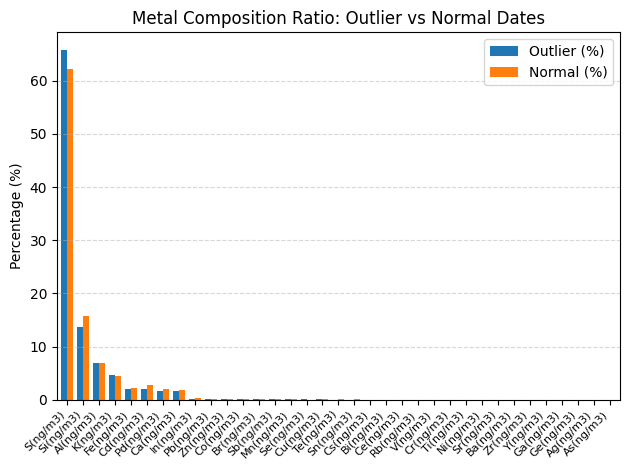

In [17]:
# 시각화
plt.figure(figsize=(10, 5))
ratio_df.plot(kind='bar', width=0.75)
plt.title('Metal Composition Ratio: Outlier vs Normal Dates')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()